In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Завантаження даних
file_path = r'C:\Users\User\Desktop\user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Виведення назв колонок
print("Назви колонок:", data.columns)

# Виведення розміру датасета
print("Розмір датасета:", data.shape)


Назви колонок: Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')
Розмір датасета: (700, 11)


In [38]:
# Видаляємо всі рядки з пропусками
data = data.dropna()

# Створюємо DataFrame та виводимо інформацію про нього
df_user_behavior = pd.DataFrame(data)  
df_user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


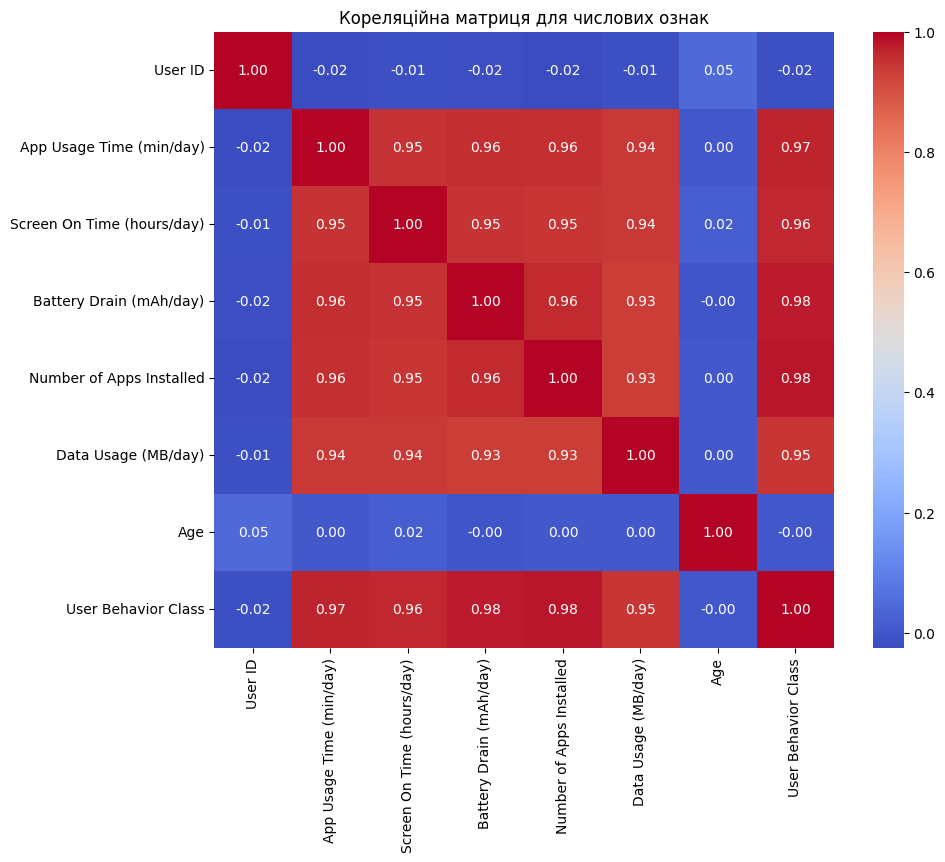

In [11]:
# Вибір тільки числових ознак для побудови кореляційної матриці
numeric_features = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця для числових ознак")
plt.show()



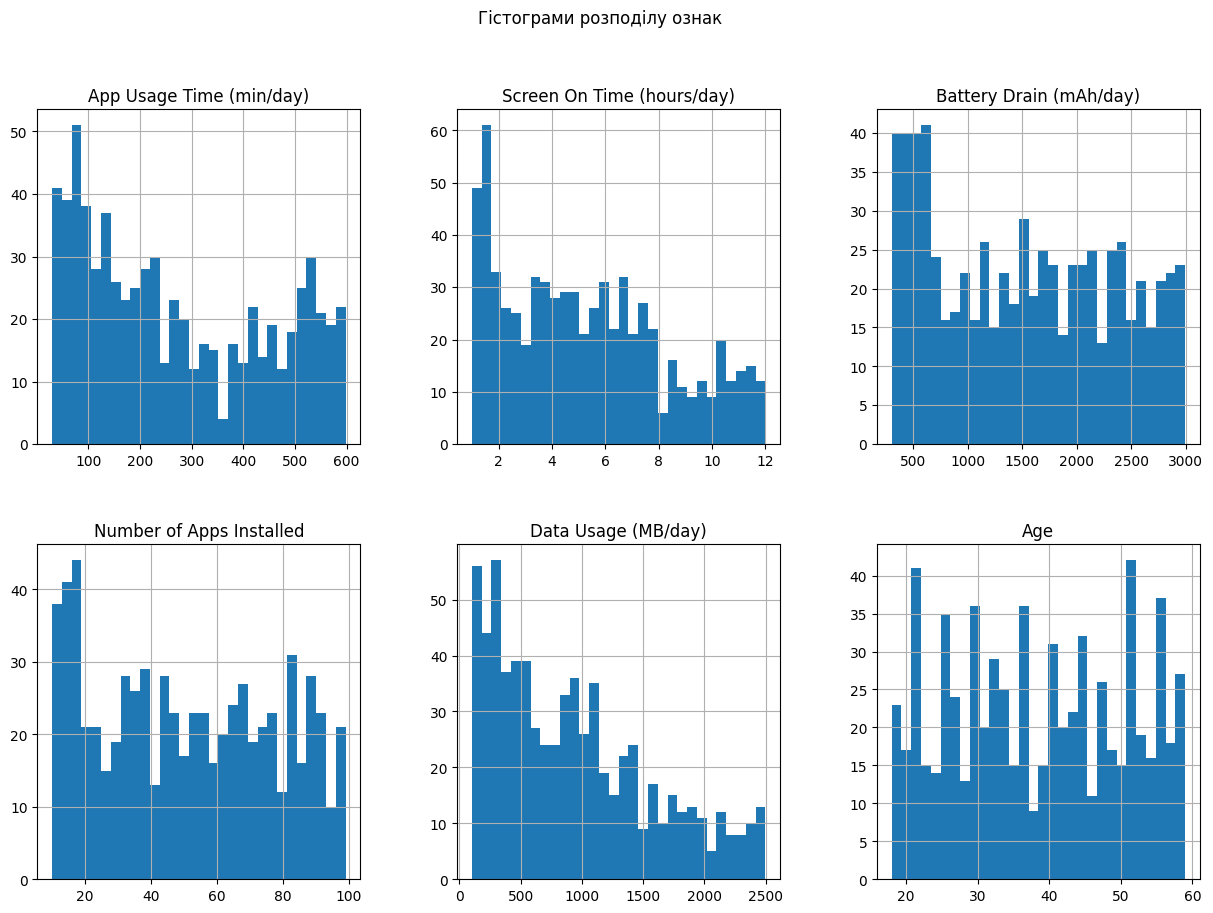

In [13]:
# Видалення зайвих пробілів у назвах колонок
data.columns = data.columns.str.strip()

# Спробуємо ще раз
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

data[numerical_features].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Гістограми розподілу ознак")
plt.show()

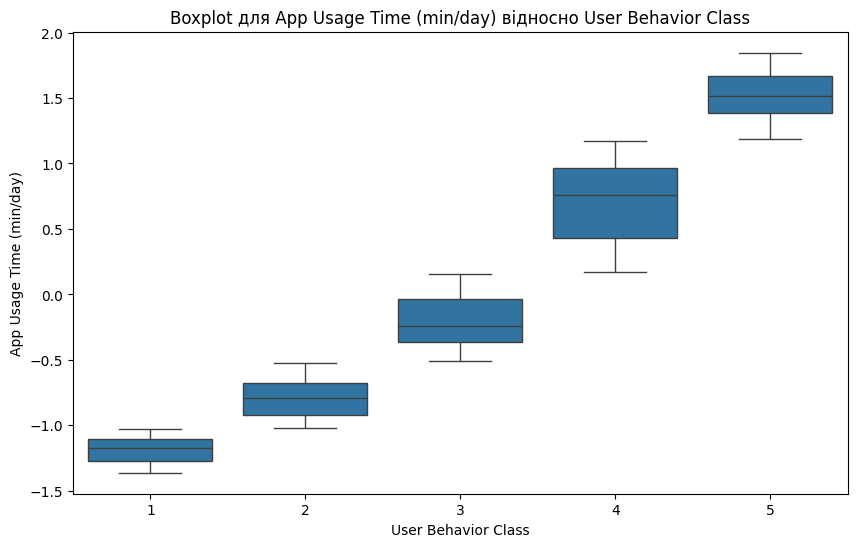

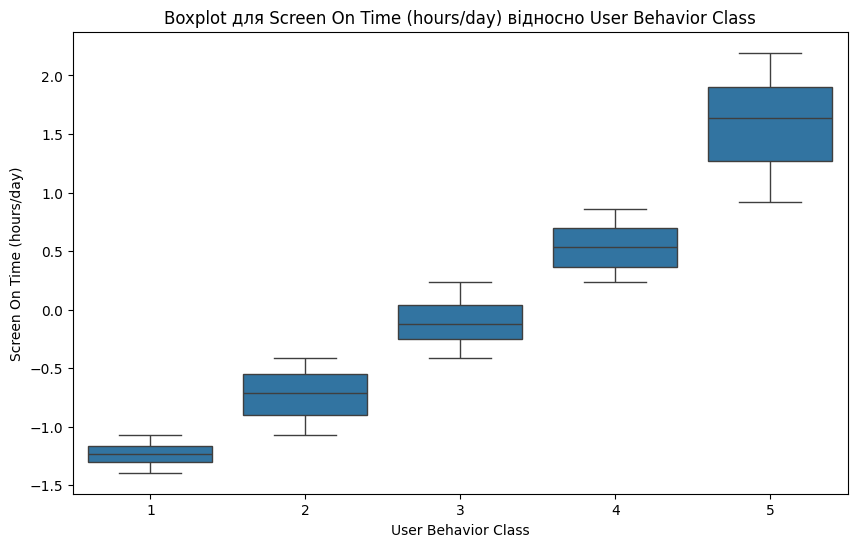

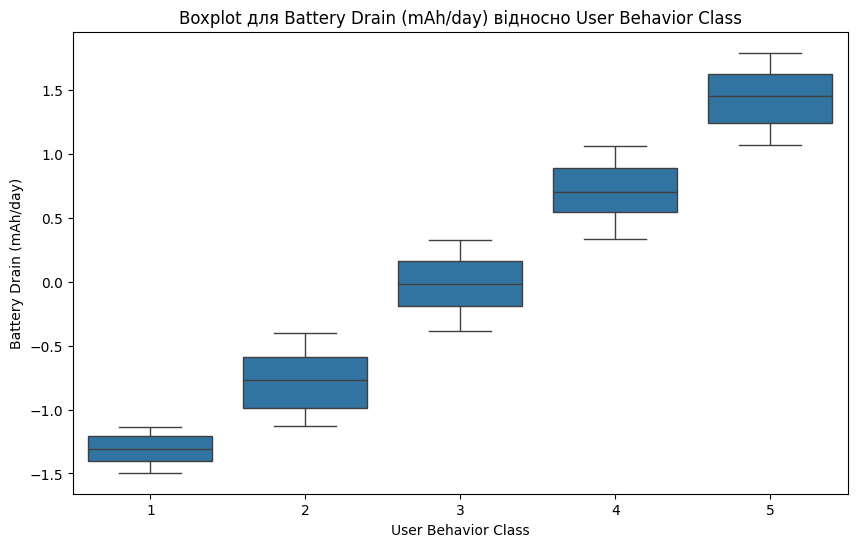

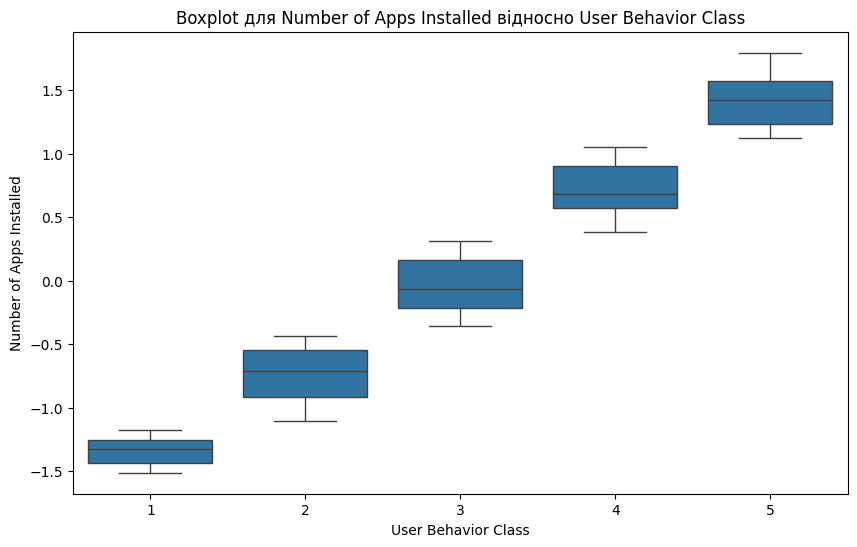

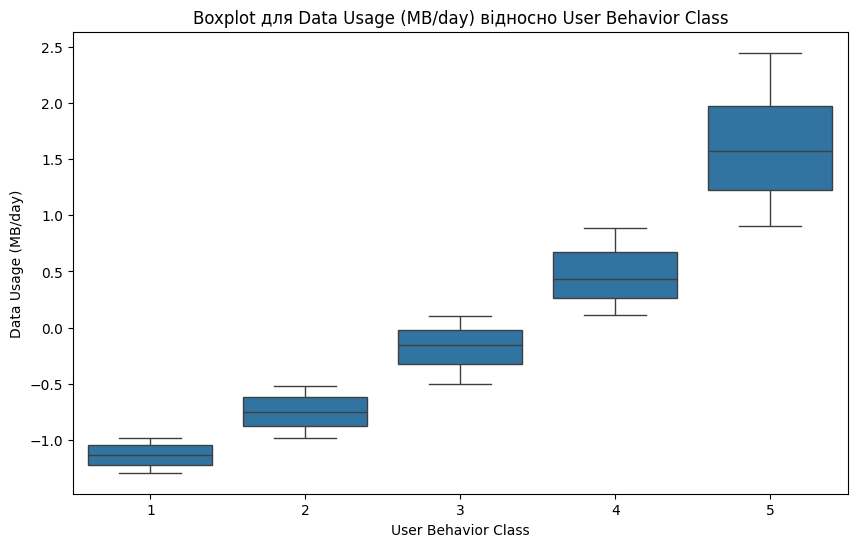

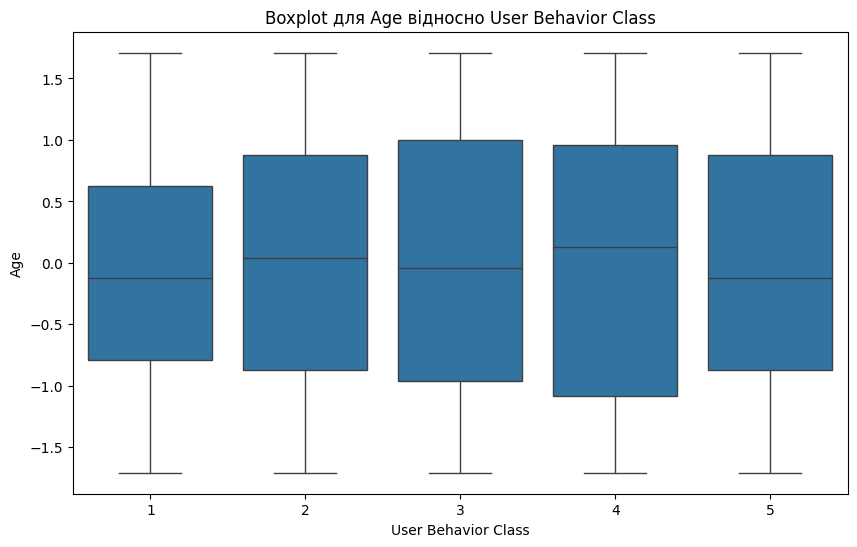

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Цільова змінна
target_variable = 'User Behavior Class'

for feature in numerical_features:
    plt.figure(figsize=(10, 6))  # Задайте розмір фігури
    ax = sns.boxplot(x=target_variable, y=feature, data=data)  # Створення boxplot
    plt.title(f"Boxplot для {feature} відносно {target_variable}")  # Заголовок графіка
    plt.xlabel(target_variable)  # Підпис осі x
    plt.ylabel(feature)  # Підпис осі y
    plt.show()  # Відобразити графік


In [23]:
# Ініціалізація StandardScaler
scaler = StandardScaler()

# Нормалізація числових даних
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Перевірка результату нормалізації
print(data.head())


   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                  0.688256   
1        2       OnePlus 9          Android                 -0.017668   
2        3    Xiaomi Mi 11          Android                 -0.661471   
3        4  Google Pixel 5          Android                 -0.181443   
4        5       iPhone 12              iOS                 -0.475107   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.367626                 0.423726   
1                   -0.186771                -0.237198   
2                   -0.415053                -0.933550   
3                   -0.154160                 0.184279   
4                   -0.317218                -0.193218   

   Number of Apps Installed  Data Usage (MB/day)       Age  Gender  \
0                  0.606096             0.300405  0.126383    Male   
1                 -0.322441             0.022277  0.709506  Female   
2 

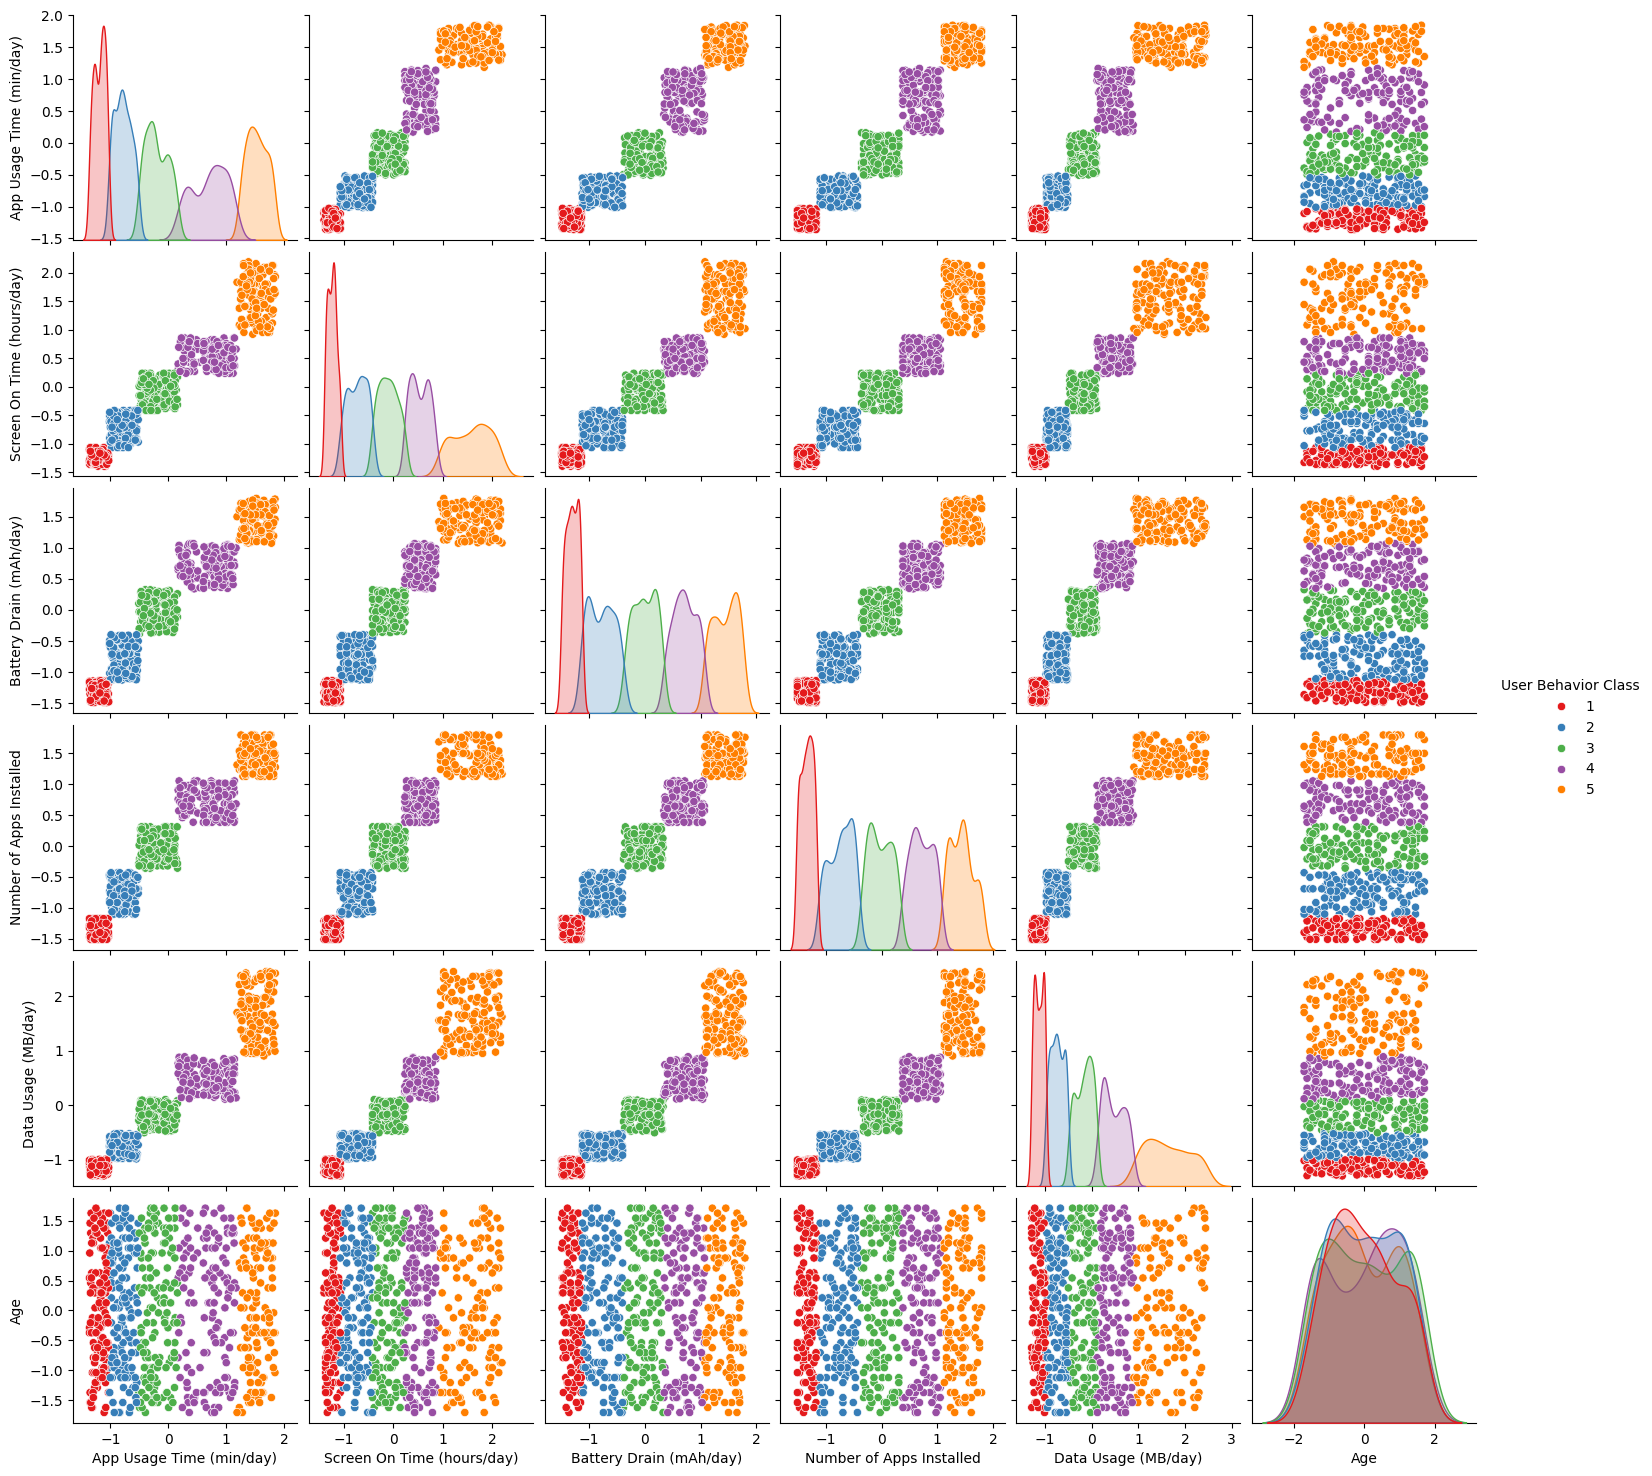

In [20]:
# pairplot_data = data[numerical_features + ['User Behavior Class']]

# Будуємо парний графік
sns.pairplot(pairplot_data, hue="Target", palette='Set1')
plt.show()

In [33]:
# Завантажте ваші дані, якщо ще не зробили цього
# data = pd.read_csv('C:/Users/User/Desktop/user_behavior_dataset.csv')

# Виберіть числові ознаки для X і цільову змінну для y
# numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
X = data[numerical_features]
y = data['User Behavior Class']

# Розділіть дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізуйте дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметри для GridSearch для kNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)

# Параметри для GridSearch для SVM
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Тренування інших класифікаторів
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

adaboost = AdaBoostClassifier(algorithm='SAMME')
adaboost.fit(X_train_scaled, y_train)

# Оцінка моделей
models = {
    'kNN': knn_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'AdaBoost': adaboost
}

# Збереження кращої моделі та її оцінка
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

# Виведення звіту про класифікацію та матрицю плутанини
print(f"\nBest Model: {best_model}")

y_pred_best = models[best_model].predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


kNN Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
AdaBoost Accuracy: 0.80

Best Model: kNN

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
